In [1]:
from matplotlib import pyplot as plt
from random import random
import numpy as np
import pandas as pd
plt.rcParams.update({'pdf.fonttype': 'truetype'})

In [2]:
alpha=1
epsilon=0.1
x=np.array(list(range(1,6)))
y=np.array([-alpha-epsilon, alpha, -3*alpha-epsilon, alpha+epsilon, 2*alpha+epsilon])
x_r=np.hstack([[0],np.array(range(0,6))+0.5,[6]])

In [3]:
r1_gb=np.array([[0,0,1,0,0]])
r1_ogb=r1_gb
r1_gs=np.array([[1,1,1,0,0]])

In [4]:
def visualise(x,y,queries,g,names,label=False, filename=None):
    fig, axs = plt.subplots(1, 3, sharey=True,sharex=False, tight_layout=True, squeeze=False, figsize=(9,2.5))
    colors=['deepskyblue','green','red']
    linestyles=[(0,(2,3)),(0,(2,3,1,3)),(0,(2,3,1,3,1,3))]
    width=[2,2,2]
    for i in range(3):
        ax=axs[0][i]
        ax.grid(True, which='both')
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.yaxis.tick_left()
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.xaxis.tick_bottom()
        ax.scatter(x, y)
        ax.scatter([0],[0],color='none')
        ax.set_ylim([-3.5,2.5])
        ax.set_xlim([0, 6.5])
        if label:
            ax.set_xlabel('X')
        if i==0:
            ax.set_ylabel('y')
        qq=queries[i]
#         print(qq)
        weight = np.linalg.inv(qq@qq.T)@qq@g
        y_hat=qq.T@weight
        y_hat1=np.hstack([[0,0],qq.T@weight,[0]])
        ax.step(x_r, y_hat1, label=r'$f(x)$',color=colors[i],linewidth=2,alpha=1)
        gg=np.hstack([[0,0],y-y_hat,[0]])  
#         ax.step(x_r, gg, '--',label=r'g',color=colors[i],linewidth=1.5, alpha=1)
#         print(x_r.shape, np.hstack([[0,0],queries[i][-1],[0]]).shape)
        for j in range(len(queries[i])):
            ax.step(x_r, np.hstack([[0,0],queries[i][j],[0]])*weight[j], 
                    linestyle=linestyles[j],label=rf'$q_{j}\beta_{j}$',color='k',linewidth=3, alpha=0.6)
        ax.text(3,2.5,names[i])
        if label and i==1:
            ax.legend()
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight',pad_inches=0.01)

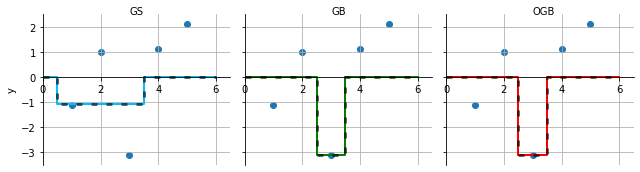

In [5]:
visualise(x,y,[r1_gs, r1_gb, r1_ogb],y, ['GS', 'GB', 'OGB'],filename='vis_rules_1.pdf')

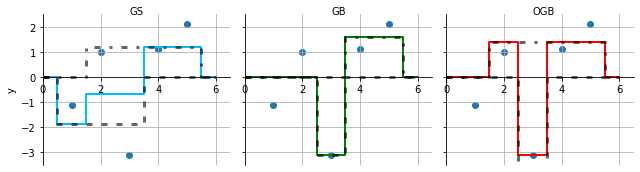

In [6]:
r2_gb=np.array([[0,0,1,0,0],[0,0,0,1,1]])
r2_ogb=np.array([[0,0,1,0,0],[0,1,1,1,1]])
r2_gs=np.array([[1,1,1,0,0],[0,1,1,1,1]])
visualise(x,y,[r2_gs, r2_gb, r2_ogb],y, ['GS', 'GB', 'OGB'],filename='vis_rules_2.pdf')

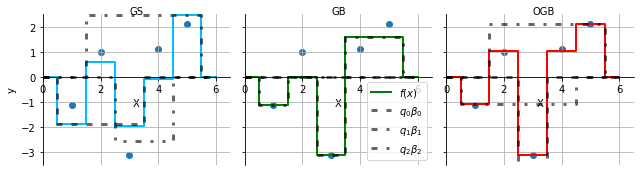

In [7]:
r3_gb=np.array([[0,0,1,0,0],[0,0,0,1,1],[1,0,0,0,0]])
r3_ogb=np.array([[0,0,1,0,0],[0,1,1,1,1],[1,1,1,1,0]])
r3_gs=np.array([[1,1,1,0,0],[0,1,1,1,1],[0,0,1,1,0]])
visualise(x,y,[r3_gs, r3_gb, r3_ogb],y, ['GS', 'GB', 'OGB'],  label=True, filename='vis_rules_3.pdf')

In [8]:
def visualise_all(x,y,queries,g,names,filename=None):
    fig, axs = plt.subplots(3, 3, sharey='row',sharex=False, tight_layout=True, squeeze=False, figsize=(9,5.2))
    colors=['deepskyblue','lime','tomato', 'mediumblue', 'green', 'darkred']
    linestyles=[(0,(2,2)),(0,(3,2,1,2)),(0,(1,2,1,2,1,2))]
    width=[2,2,2]
    for k in range(3):
        for i in range(3):
            ax=axs[k][i]
#             ax.grid(True, which='both')
            ax.spines['left'].set_position('zero')
            ax.spines['right'].set_color('none')
            ax.yaxis.tick_left()
            ax.spines['bottom'].set_position('zero')
            ax.spines['top'].set_color('none')
            ax.xaxis.tick_bottom()
            ax.scatter(x, y,color='k')
            ax.scatter([0],[0],color='none')
#             ax.set_ylim([-4.5,2.6])
            ax.set_xlim([0, 6.5])
            if k==2:
                ax.text(3, -0.9, 'X')
#                 ax.set_xlabel('X')
            if i==0:
                ax.set_ylabel('y')
            if i==0:
                ax.text(0.2,1.8, rf'$t = {k+1}$', fontsize=12)
            qq=queries[k][i]
#             print(type(qq))
            weight = np.linalg.inv(qq@qq.T)@qq@g
            y_hat=qq.T@weight
            y_hat1=np.hstack([[0,0],qq.T@weight,[0]])
            ax.step(x_r, y_hat1, color=colors[i],linewidth=3,alpha=0.6)
            gg=np.hstack([[0,0],y-y_hat,[0]])  
    #         ax.step(x_r, gg, '--',label=r'g',color=colors[i],linewidth=1.5, alpha=1)
    #         print(x_r.shape, np.hstack([[0,0],queries[i][-1],[0]]).shape)
            if k!=0:
#                 for j in range(len(queries[k][i])):
                    ax.step(x_r, np.hstack([[0,0],queries[k][i][-1],[0]])*weight[-1], 
                            linestyle=linestyles[0],color=colors[i+3],linewidth=3.5, alpha=0.6)
            if k==0:
                ax.text(3,2.5,names[i])
            if k==1 and i==1:
                ax.plot([],[], linestyle='-', color='k', linewidth=2.5,alpha=0.8, label=r'$f(x)$')
                for j in range(3):
                    ax.plot([],[],  
                        linestyle=linestyles[j],label=rf'$q_{j}\beta_{j}$',color='k',linewidth=4, alpha=0.6)
#                 ax.legend(handlelength=4)
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight',pad_inches=0.01)

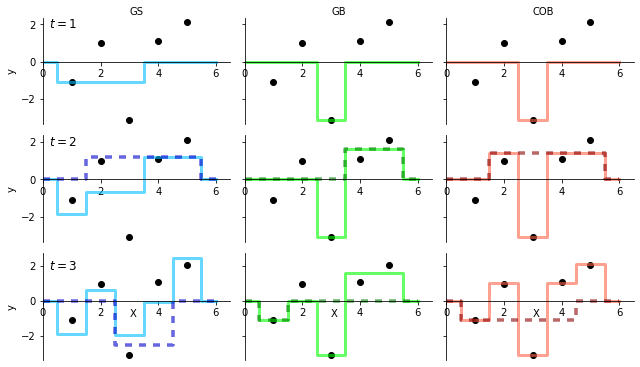

In [9]:
visualise_all(x,y,[[r1_gs, r1_gb, r1_ogb],[r2_gs, r2_gb, r2_ogb], [r3_gs, r3_gb, r3_ogb]],
              y, ['GS', 'GB', 'COB'],filename='visual_proof.pdf')

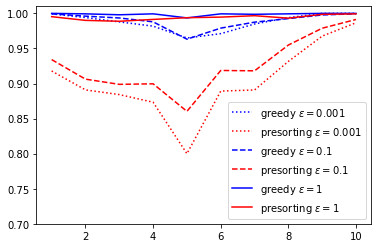

In [10]:
rules=range(1,11)

line_style=[':','--','-']
j=-1
for epsilon in [0.001, 0.1, 1]:
    rates_pre=[]
    rates_pn=[]
    approx=0.9
    j+=1
    row=int((approx-0.75)/0.01)
    for i in rules:
        pre_rates=pd.read_csv('./bounding_function/greedy/pre_sort_15pt_'+str(i)+'rules.csv')
        pn_rates=pd.read_csv('./bounding_function/greedy/greedy_15pt_'+str(i)+'rules.csv')
        rates_pre.append(pre_rates.iloc[row][str(epsilon) if epsilon!=1 else 3])
        rates_pn.append(pn_rates.iloc[row][str(epsilon) if epsilon!=1 else 3])
    plt.plot(rules, rates_pn, 'b'+line_style[j], label=rf'greedy $\epsilon={epsilon}$')
    plt.plot(rules, rates_pre, 'r'+line_style[j], label=rf'presorting $\epsilon={epsilon}$')
plt.ylim([.7,1.01])
plt.legend()
plt.show()

In [11]:
pre_rates=pd.read_csv('./bounding_function/greedy/pre_sort_15pt_'+str(5)+'rules.csv')
len(pre_rates)

26

/tmp/ipykernel_991/2428369540.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "margin" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('approx_rules_99.pdf', margin=0)


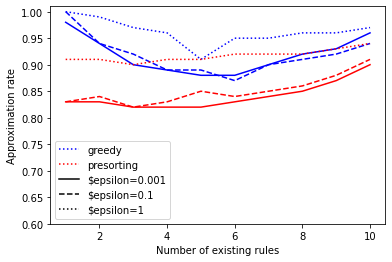

In [12]:
rules=range(1,11)

line_style=['-','--',':']
j=-1
for epsilon in [0.001, 0.1, 1]:
    rates_pre=[]
    rates_pn=[]
    success_rate=0.99
    j+=1
    for i in rules:
        pre_rates=pd.read_csv('./bounding_function/greedy/pre_sort_15pt_'+str(i)+'rules.csv')
        pn_rates=pd.read_csv('./bounding_function/greedy/greedy_15pt_'+str(i)+'rules.csv')
        for k in range(len(pre_rates)):
            if pre_rates.iloc[k][str(epsilon) if epsilon!=1 else 3]>=success_rate:
                continue
            else:
                break
        rates_pre.append(k*.01+.75)
        for k in range(len(pn_rates)):
            if pn_rates.iloc[k][str(epsilon) if epsilon!=1 else 3]>=success_rate:
                continue
            else:
                break
        rates_pn.append(k*.01+.75)
    if epsilon!=1:
        plt.plot(rules, rates_pn, 'b'+line_style[j])#, label=rf'greedy $\epsilon={epsilon}$')
        plt.plot(rules, rates_pre, 'r'+line_style[j])#, label=rf'presorting $\epsilon={epsilon}$')
    else:
        plt.plot(rules, rates_pn, 'b'+line_style[j], label=rf'greedy')
        plt.plot(rules, rates_pre, 'r'+line_style[j], label=rf'presorting')
plt.plot([],[],'k-',label=rf'$epsilon=0.001')
plt.plot([],[],'k--',label=rf'$epsilon=0.1')
plt.plot([],[],'k:',label=rf'$epsilon=1')
plt.ylim([.6,1.01])
plt.legend()
plt.xlabel('Number of existing rules')
plt.ylabel('Approximation rate')
# plt.show()
plt.savefig('approx_rules_99.pdf', margin=0)

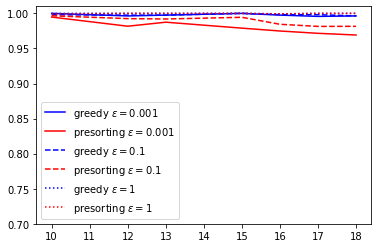

In [13]:
points=[10,12,13,15,16,17, 18]

line_style=['-','--',':']
j=-1
for epsilon in [0.001, 0.1, 1]:
    j+=1
    approx=0.85
    rates_pre=[]
    rates_pn=[]
    row=int((approx-0.75)/0.01)
    for pt in points:
        pre_rates=pd.read_csv('./bounding_function/greedy/pre_sort_'+str(pt)+'pt_5rules.csv')
        pn_rates=pd.read_csv('./bounding_function/greedy/greedy_'+str(pt)+'pt_5rules.csv')
        rates_pre.append(pre_rates.iloc[row][str(epsilon) if epsilon!=1 else 3])
        rates_pn.append(pn_rates.iloc[row][str(epsilon) if epsilon!=1 else 3])
    plt.plot(points, rates_pn, 'b'+line_style[j], label=rf'greedy $\epsilon={epsilon}$')
    plt.plot(points, rates_pre, 'r'+line_style[j], label=rf'presorting $\epsilon={epsilon}$')
plt.ylim([.7,1.01])
plt.legend()
plt.show()

/tmp/ipykernel_991/442860427.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "margin" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('approx_data_points_99.pdf', margin=0)


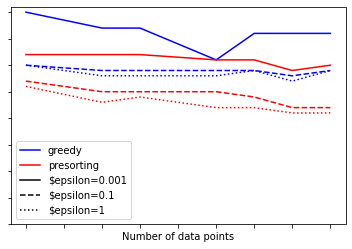

In [14]:
points=[10,12,13,15,16,17, 18]

line_style=[':','--','-']
j=-1
for epsilon in [0.001, 0.1, 1]:
    j+=1
    success_rate=.99
    rates_pre=[]
    rates_pn=[]
    for pt in points:
        pre_rates=pd.read_csv('./bounding_function/greedy/pre_sort_'+str(pt)+'pt_5rules.csv')
        pn_rates=pd.read_csv('./bounding_function/greedy/greedy_'+str(pt)+'pt_5rules.csv')
        for k in range(len(pre_rates)):
            if pre_rates.iloc[k][str(epsilon) if epsilon!=1 else 3]>=success_rate:
                continue
            else:
                break
        rates_pre.append(k*.01+.75)
        for k in range(len(pn_rates)):
            if pn_rates.iloc[k][str(epsilon) if epsilon!=1 else 3]>=success_rate:
                continue
            else:
                break
        rates_pn.append(k*.01+.75)
    if epsilon!=1:
        plt.plot(points, rates_pn, 'b'+line_style[j])#, label=rf'greedy $\epsilon={epsilon}$')
        plt.plot(points, rates_pre, 'r'+line_style[j])#, label=rf'presorting $\epsilon={epsilon}$')
    else:
        plt.plot(points, rates_pn, 'b'+line_style[j], label=rf'greedy')
        plt.plot(points, rates_pre, 'r'+line_style[j], label=rf'presorting')
plt.plot([],[],'k-',label=rf'$epsilon=0.001')
plt.plot([],[],'k--',label=rf'$epsilon=0.1')
plt.plot([],[],'k:',label=rf'$epsilon=1')
plt.ylim([.6,1.01])
plt.tick_params(left = True, right = False , labelleft = False , 
                labelbottom = False, bottom = True) 
plt.legend()
plt.xlabel('Number of data points')
# plt.ylabel('Approximation rate')
plt.savefig('approx_data_points_99.pdf', margin=0)

/tmp/ipykernel_991/2465224516.py:78: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "margin" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('approx_data_points_99.pdf', margin=0)


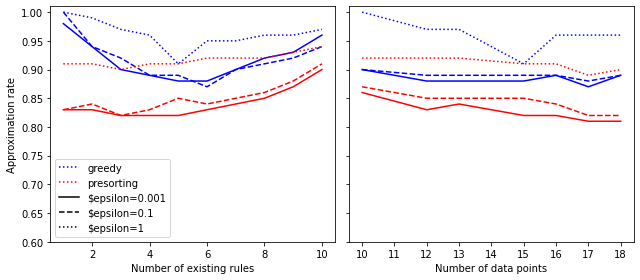

In [15]:
rules=range(1,11)
fig, axs = plt.subplots(1, 2, sharey=True,sharex=False, tight_layout=True, squeeze=False, figsize=(9,4))
line_style=['-','--',':']
j=-1
for epsilon in [0.001, 0.1, 1]:
    rates_pre=[]
    rates_pn=[]
    success_rate=0.99
    j+=1
    for i in rules:
        pre_rates=pd.read_csv('./bounding_function/greedy/pre_sort_15pt_'+str(i)+'rules.csv')
        pn_rates=pd.read_csv('./bounding_function/greedy/greedy_15pt_'+str(i)+'rules.csv')
        for k in range(len(pre_rates)):
            if pre_rates.iloc[k][str(epsilon) if epsilon!=1 else 3]>=success_rate:
                continue
            else:
                break
        rates_pre.append(k*.01+.75)
        for k in range(len(pn_rates)):
            if pn_rates.iloc[k][str(epsilon) if epsilon!=1 else 3]>=success_rate:
                continue
            else:
                break
        rates_pn.append(k*.01+.75)
    if epsilon!=1:
        axs[0][0].plot(rules, rates_pn, 'b'+line_style[j])#, label=rf'greedy $\epsilon={epsilon}$')
        axs[0][0].plot(rules, rates_pre, 'r'+line_style[j])#, label=rf'presorting $\epsilon={epsilon}$')
    else:
        axs[0][0].plot(rules, rates_pn, 'b'+line_style[j], label=rf'greedy')
        axs[0][0].plot(rules, rates_pre, 'r'+line_style[j], label=rf'presorting')
axs[0][0].plot([],[],'k-',label=rf'$epsilon=0.001')
axs[0][0].plot([],[],'k--',label=rf'$epsilon=0.1')
axs[0][0].plot([],[],'k:',label=rf'$epsilon=1')
axs[0][0].set_ylim([.6,1.01])
axs[0][0].legend()
axs[0][0].set_xlabel('Number of existing rules')
axs[0][0].set_ylabel('Approximation rate')
# plt.show()
points=[10,12,13,15,16,17, 18]

line_style=['-','--',':']
j=-1
for epsilon in [0.001, 0.1, 1]:
    j+=1
    success_rate=.99
    rates_pre=[]
    rates_pn=[]
    for pt in points:
        pre_rates=pd.read_csv('./bounding_function/greedy/pre_sort_'+str(pt)+'pt_5rules.csv')
        pn_rates=pd.read_csv('./bounding_function/greedy/greedy_'+str(pt)+'pt_5rules.csv')
        for k in range(len(pre_rates)):
            if pre_rates.iloc[k][str(epsilon) if epsilon!=1 else 3]>=success_rate:
                continue
            else:
                break
        rates_pre.append(k*.01+.75)
        for k in range(len(pn_rates)):
            if pn_rates.iloc[k][str(epsilon) if epsilon!=1 else 3]>=success_rate:
                continue
            else:
                break
        rates_pn.append(k*.01+.75)
    if epsilon!=1:
        axs[0][1].plot(points, rates_pn, 'b'+line_style[j])#, label=rf'greedy $\epsilon={epsilon}$')
        axs[0][1].plot(points, rates_pre, 'r'+line_style[j])#, label=rf'presorting $\epsilon={epsilon}$')
    else:
        axs[0][1].plot(points, rates_pn, 'b'+line_style[j], label=rf'greedy')
        axs[0][1].plot(points, rates_pre, 'r'+line_style[j], label=rf'presorting')
axs[0][1].plot([],[],'k-',label=rf'$epsilon=0.001')
axs[0][1].plot([],[],'k--',label=rf'$epsilon=0.1')
axs[0][1].plot([],[],'k:',label=rf'$epsilon=1')
# axs[0][1].ylim([.6,1.01])
# axs[0][1].tick_params(left = True, right = False , labelleft = False , 
#                 labelbottom = False, bottom = True) 
# plt.legend()
axs[0][1].set_xlabel('Number of data points')
# plt.ylabel('Approximation rate')
plt.savefig('approx_data_points_99.pdf', margin=0)